In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
class Derivative:
    def __init__(self, function, interval):
        self.f = function
        self.a, self.b = interval
    
    def calculate(self, x, order=1, precision = 1, h = 0.01):
        if order == 1:
            return self.first_order_deriv(x, precision, h)
        elif order == 2:
            return self.sec_order_deriv(x, precision, h)
    
    def first_order_deriv(self, x, precision, h):
        if precision == 1:
            if x == self.b:
                return (self.f(x) - self.f(x-h)) / h
            else:
                return (self.f(x + h) - self.f(x)) / h
        elif precision == 2:
            if x == self.b:
                expr = f(x - 2 * h) - 4 * f(x - h) + 3 * f(x)
                return expr / (2 * h)
            elif x == self.a:
                expr = -f(x + 2 * h) + 4 * f(x + h) - 3 * f(x)
                return expr / (2 * h)
            else:
                expr = f(x + h) - f(x - h)
                return expr / (2 * h)
        elif precision == 4:
            if x == self.b or x == self.b - h:
                expr = 25 * f(x) - 48 * f(x - h) + 36 * f(x - 2 * h) - 16 * f(x - 3 * h) + 3 * f(x - 4  * h)
                return expr / (12 * h)
            elif x == self.a or x == self.a + h:
                expr = -25 * f(x) + 48 * f(x + h) - 36 * f(x + 2 * h) + 16 * f(x + 3 * h) - 3 * f(x + 4  * h)
                return expr / (12 * h)
            else:
                expr = 8 * f(x + h)  - f(x + 2 * h) - 8 * f(x - h) + f(x - 2 * h)
                return expr / (12 * h)
    
    def sec_order_deriv(self, x , precision, h):
        if precision == 2:
            if x == self.b:
                expr = 2 * f(x) - 5 * f(x - h) + 4 * f(x - 2 * h) - f(x - 3 * h)
                return expr / (h**2)
            elif x == self.a:
                expr = 2 * f(x) - 5 * f(x + h) + 4 * f(x + 2 * h) - f(x + 3 * h)
                return expr / (h**2)
            else:
                expr = f(x - h) - 2 * f(x) + f(x + h)
                return expr / (h**2)
        elif precision == 4:
            expr = -f(x - 2 * h) + 16 * f(x - h) - 30 * f(x) + 16 * f(x + h) - f(x + 2 * h)
            return expr/(12 * h**2)

In [4]:
def f(x):
    return np.exp(-x**2) * np.log1p(x**2)

def f_first_derivative(x):
    return - 2 * np.exp(-x**2) * x * ((1 + x**2)*np.log1p(x**2) - 1) / (1 + x**2)
    
def f_sec_derivative(x):
    num = np.exp(-x**2) * (-8 * x**4 - 10 * x**2 + (4 * x**6 + 6 * x**4 - 2) * np.log1p(x**2) + 2)
    return num / ((1 + x**2) ** 2)


a = -3
b = 3

In [5]:
num_deriv = Derivative(function=f,interval=(a,b))

In [6]:
x = b
print(f"Precise value of derivative of f(x) at x = {x} is equal \n{f_first_derivative(x)}")

ord1_prec4, ord1_prec2, ord1_prec1 = num_deriv.calculate(x=x, order=1, precision=4, h=0.01),\
num_deriv.calculate(x=x, order=1, precision=2, h=0.01), num_deriv.calculate(x=x, order=1, precision=1, h=0.01)

print(f"Numerical values of derivative of f(x) at x = {x} with precisions 4, 2, 1  \
are, respectively, equal \n{ord1_prec4}, {ord1_prec2}, {ord1_prec1}")
num_deriv.calculate(x=b, order=2, precision=4, h=0.01)

Precise value of derivative of f(x) at x = 3 is equal 
-0.0016309235688638166
Numerical values of derivative of f(x) at x = 3 with precisions 4, 2, 1  are, respectively, equal 
-0.0016309220580238298, -0.001629433807134184, -0.0016754181248439823


0.008753197174063568

### Plotting error graphs

In [6]:
def compute_max_error(num_deriv, order, precision, nodes, h):
    max_error = 0
    for x_i in nodes:
        err = abs(num_deriv.calculate(x=x_i, order=order, precision=precision,h=h) - 
                      f_first_derivative(x=x_i))
        if err > max_error:
            max_error = err
    return max_error

In [7]:
def compute_error(num_deriv, interval, order, precision, count_min = 10, count_max = 10**3):
    '''Returns pair of arrays (hh, max_errors),
        where max_errors[i] corresponds to hh[i]
    '''
    a, b = interval
    hh = []
    errors = []
    for count in np.arange(count_min, count_max, step = 10):
        xx_i, h_i = np.linspace(a, b, count, endpoint=True, retstep=True)
        max_error_i = compute_max_error(num_deriv=num_deriv, order=order, precision=precision, nodes = xx_i, h=h_i)
        hh.append(h_i)
        errors.append(max_error_i)
    return hh, errors

In [8]:
def cut_num(number,count=6):
    number_dec = str(number-int(number))[1:count+2]
    return str(int(number)) + number_dec


In [39]:
def plot_first_deriv_error():
    sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
    plt.figure(figsize=(9,9))
    
    hh1, max_errors1 = compute_error(num_deriv=num_deriv, interval=(a,b), order = 1, precision=1)
    plt.plot(np.log2(hh1), np.log2(max_errors1),'r-',label='precision = 1',lw=3)
    hh2, max_errors2 = compute_error(num_deriv=num_deriv, interval=(a,b), order = 1, precision=2)
    plt.plot(np.log2(hh2), np.log2(max_errors2),'b-',label='precision = 2',lw=3)
    hh4, max_errors4 = compute_error(num_deriv=num_deriv, interval=(a,b), order = 1, precision=4)
    plt.plot(np.log2(hh4), np.log2(max_errors4),'g-',label='precision = 4',lw=3)
    hh = hh1
    
    plt.legend()
    plt.title("Dependence of first derivative's error from step size",fontsize=16)
    plt.xlabel("log2(h)",fontdict={'fontsize':14})
    plt.ylabel("log2(r)",fontdict={'fontsize':14})
    
    k1=(np.log2(max_errors1)[-40] -  np.log2(max_errors1)[-1]) / (np.log2(hh[-40]) - np.log2(hh[-1]))
    k2=(np.log2(max_errors2)[-40] -  np.log2(max_errors2)[-1]) / (np.log2(hh[-40]) - np.log2(hh[-1]))
    k4=(np.log2(max_errors4)[-40] -  np.log2(max_errors4)[-1]) / (np.log2(hh[-40]) - np.log2(hh[-1]))
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(-6.5, -24, f"k4 = {cut_num(k4)}",  fontsize=14,
        verticalalignment='top', bbox=props)
    plt.text(-6.5, -13, f"k2 = {cut_num(k2)}",  fontsize=14,
        verticalalignment='top', bbox=props)
    plt.text(-6.5, -7, f"k1 = {cut_num(k1)}",  fontsize=14,
        verticalalignment='top', bbox=props)    


In [40]:
# hh, max_errors =compute_error(num_deriv=num_deriv, interval=(a,b), order = 1, precision=1)
# plt.plot(np.log2(hh), np.log2(max_errors),'r-')
# hh, max_errors =compute_error(num_deriv=num_deriv, interval=(a,b), order = 1, precision=2)
# plt.plot(np.log2(hh), np.log2(max_errors),'b-')
# hh, max_errors =compute_error(num_deriv=num_deriv, interval=(a,b), order = 1, precision=4)
# plt.plot(np.log2(hh), np.log2(max_errors),'y-')
# np.log2(hh[-23]), np.log2(max_errors)[-1]
# np.log2(hh[-80]), np.log2(max_errors)[-40]
# (np.log2(max_errors)[-40] -  np.log2(max_errors)[-1]) / (np.log2(hh[-40]) - np.log2(hh[-1]))

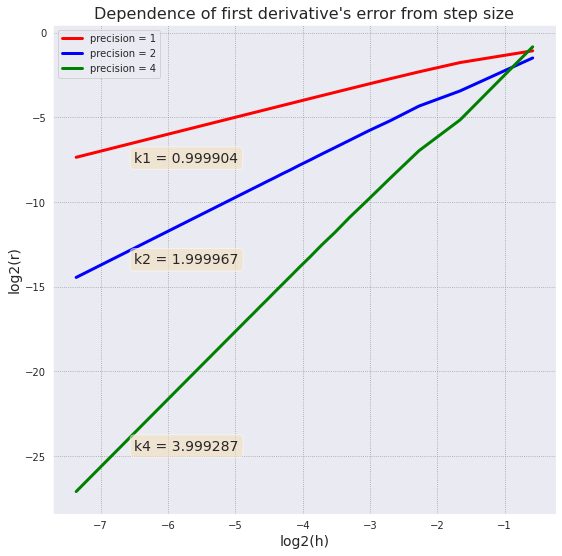

In [41]:
plot_first_deriv_error()

In [45]:
def plot_sec_deriv_error():
    sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
    plt.figure(figsize=(9,9))

    hh2, max_errors2 = compute_error(num_deriv=num_deriv, interval=(a,b), order = 2, precision=2)
    plt.plot(np.log2(hh2), np.log2(max_errors2),'b-',label='precision = 2',lw=3)
    hh4, max_errors4 = compute_error(num_deriv=num_deriv, interval=(a,b), order = 2, precision=4)
    plt.plot(np.log2(hh4), np.log2(max_errors4),'g-',label='precision = 4',lw=3)
    hh = hh2
    
    plt.legend()
    plt.title("Dependence of second derivative's error from step size",fontsize=16)
    plt.xlabel("log2(h)",fontdict={'fontsize':14})
    plt.ylabel("log2(r)",fontdict={'fontsize':14})
    
#     k2=(np.log2(max_errors2)[-40] -  np.log2(max_errors2)[-1]) / (np.log2(hh[-40]) - np.log2(hh[-1]))
#     k4=(np.log2(max_errors4)[-40] -  np.log2(max_errors4)[-1]) / (np.log2(hh[-40]) - np.log2(hh[-1]))
    
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     plt.text(-6.5, -24, f"k4 = {cut_num(k4)}",  fontsize=14,
#         verticalalignment='top', bbox=props)
#     plt.text(-6.5, -13, f"k2 = {cut_num(k2)}",  fontsize=14,
#         verticalalignment='top', bbox=props)
  

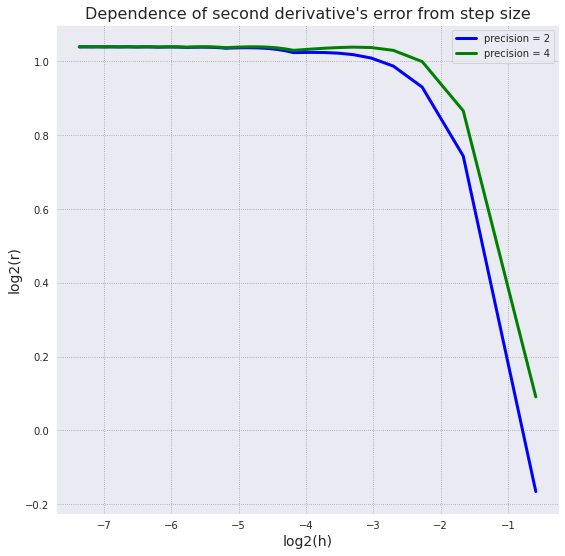

In [46]:
plot_sec_deriv_error()